### Task: What else do people ages 19-24 who've broken bones have in common with each other?

### Task: What else do people who've both ran a marathon and had braces have in common?

Each week I challenge myself to find and solve a task on kaggle to build a better Data Science portfolio. For this week's challenge I chose to knock out two similar tasks with one notebook.

Special thanks to:
* Benjamin Soyka https://www.kaggle.com/bsoyka3 for both the dataset and the challenge. I'm grateful to have a less serious task to tackle this week.

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/have-you-ever/responses.csv


## Step 1: Load the data

I'll begin by loading the data into three different dataframes. The full dataframe, the dataframe that meets the criteria of the first task, and the dataframe that meets the condition of the second task. The two task dataframes will be created using pandas filters.

In [2]:
full_df = pd.read_csv('/kaggle/input/have-you-ever/responses.csv')
full_df = full_df.drop(['Timestamp'], axis=1) #timestamp isn't necessary for this challenge
full_df.head()

,Age range,broken a bone,been on the radio or television,gotten a speeding ticket,gone skydiving,been to Europe,driven a boat,been on water skis,been on a motorcycle,been horseback riding,...,been pooped on by a bird,been stung by a jellyfish,had braces,had contacts or glasses,been in a major natural disaster,fallen down the stairs,faked being sick,sung in the shower,gotten locked out of your car or house,been shown on a JumboTron at a sporting event
0,0-18,False,True,False,False,True,True,False,True,True,...,False,False,True,True,False,True,False,True,True,False
1,0-18,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0-18,False,False,False,False,False,False,True,False,True,...,True,False,True,True,False,True,True,True,True,False
3,19-24,False,False,False,False,True,True,False,False,False,...,True,True,False,False,False,False,True,True,False,False
4,0-18,False,False,False,False,True,False,False,False,True,...,True,False,False,True,False,True,True,False,True,False


In [3]:
col_list = list(full_df.columns)
col_list#unhide to see the full list of columns referenced in later cells

['Age range',
 'broken a bone',
 'been on the radio or television',
 'gotten a speeding ticket',
 'gone skydiving',
 'been to Europe',
 'driven a boat',
 'been on water skis',
 'been on a motorcycle',
 'been horseback riding',
 'ridden on a bull',
 'ridden on a sheep',
 'stayed awake for an entire night',
 'been alpine skiing',
 'ran a marathon',
 'regifted a gift',
 'had your cell phone ring at an embarrassing moment',
 'gotten stitches',
 "paid for a stranger's meal",
 'had a tooth pulled out',
 'held a butterfly in your hand',
 'been pooped on by a bird',
 'been stung by a jellyfish',
 'had braces',
 'had contacts or glasses',
 'been in a major natural disaster',
 'fallen down the stairs',
 'faked being sick',
 'sung in the shower',
 'gotten locked out of your car or house',
 'been shown on a JumboTron at a sporting event']

In [4]:
task_1 = full_df.loc[full_df['Age range'] == '19-24']
task_1 = task_1.loc[task_1['broken a bone'] == True]
task_1.shape

(430, 31)

In [5]:
task_2 = full_df.loc[full_df['ran a marathon'] == True]
task_2 = task_2.loc[task_2['had braces'] == True]
task_2.shape

(73, 31)

##### Disclaimer: Task 2 group size
There are only 73 observed cases who have both run a marathon and had braces. This makes up less than 5% of the dataset. Because of the small sample size, these results might not generalize well.

## Step 2: Compare  similarities

Below we will view which features each dataframe has with 90% or higher conformity (90% or more of the group had the same answer). 


In [6]:
print('###Full Data Set###\n')
for val in col_list:
    _ = full_df[val].value_counts()
    if val == 'Age range':
        pass
    elif _[1] <= 300 or _[1] >= 3000:
        print(val, '\nFalse:', _[0], 'True:', _[1],'\n')

print('\n\n###Task 1 Subset###\n')
for val in col_list:
    _ = task_1[val].value_counts()
    if val == 'Age range' or val == 'broken a bone':
        pass
    elif _[1] <= 43 or _[1] >= 387:
        print(val, '\nFalse:', _[0], 'True:', _[1],'\n')

print('\n\n###Task 2 Subset###\n')
for val in col_list:
    _ = task_2[val].value_counts()
    if val == 'ran a marathon' or val == 'had braces':
        pass
    elif _[1] <= 10 or _[1] >= 63:
        print(val, '\nFalse:', _[0], 'True:', _[1],'\n')

###Full Data Set###

gone skydiving 
False: 3173 True: 126 

ridden on a bull 
False: 3231 True: 62 

ridden on a sheep 
False: 3237 True: 56 

stayed awake for an entire night 
False: 266 True: 3031 

ran a marathon 
False: 3153 True: 141 



###Task 1 Subset###

gone skydiving 
False: 414 True: 15 

ridden on a bull 
False: 419 True: 11 

ridden on a sheep 
False: 421 True: 8 

stayed awake for an entire night 
False: 19 True: 411 

ran a marathon 
False: 412 True: 16 

sung in the shower 
False: 42 True: 388 



###Task 2 Subset###

gone skydiving 
False: 65 True: 8 

ridden on a bull 
False: 70 True: 3 

ridden on a sheep 
False: 69 True: 3 

stayed awake for an entire night 
False: 8 True: 64 

sung in the shower 
False: 6 True: 67 



Looking above there isn't much for unifying factors. The two task subgroups both are more likely to have sung in the shower than the rest of the population. 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Countplots

Below we have a series of countplots depicting the True/False frequencies for each group. while the total values for the three groups will have different scales, one can get a good understanding of the ratios by viewing the plots side by side

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


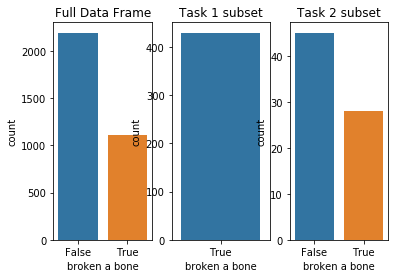

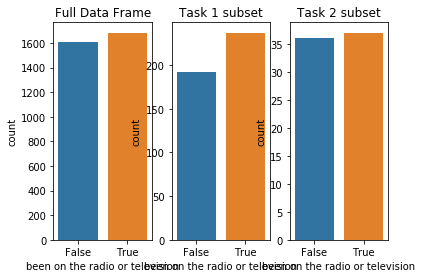

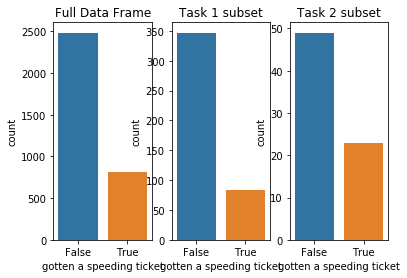

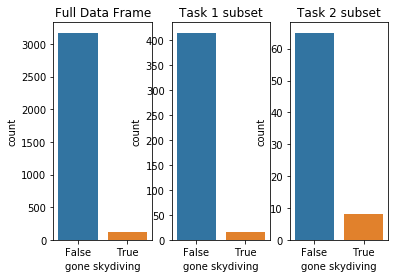

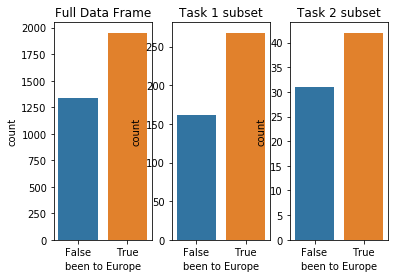

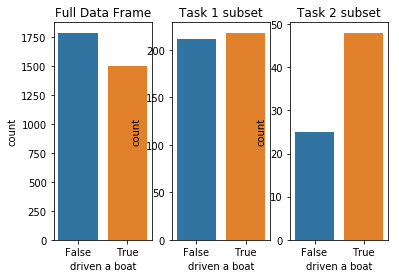

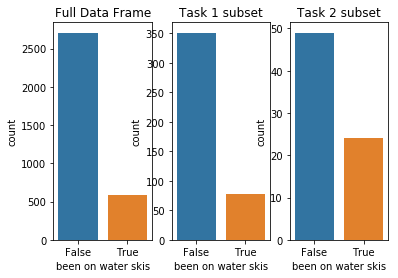

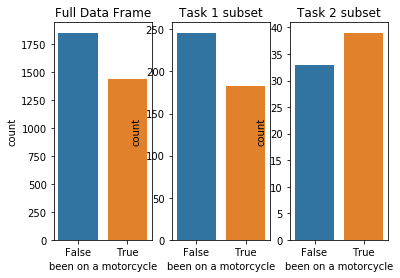

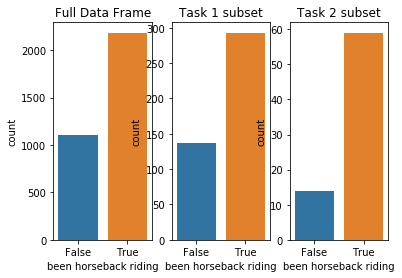

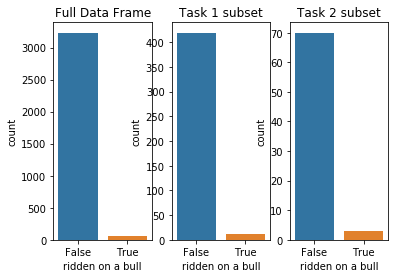

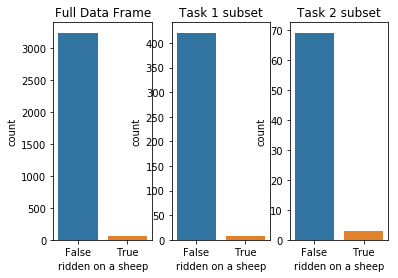

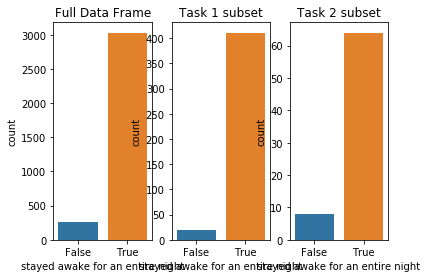

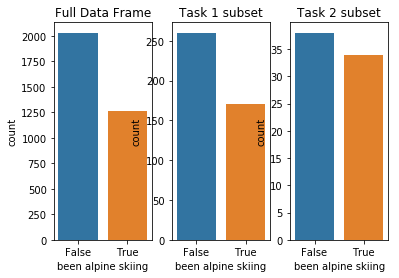

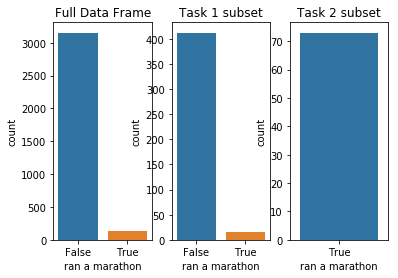

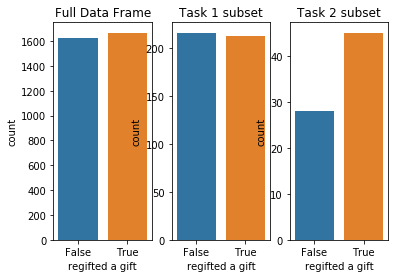

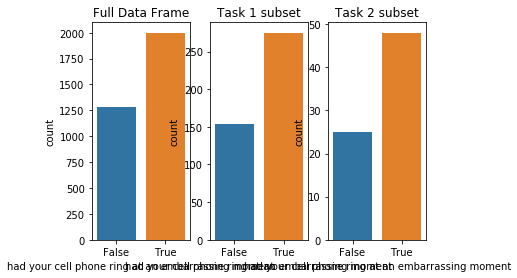

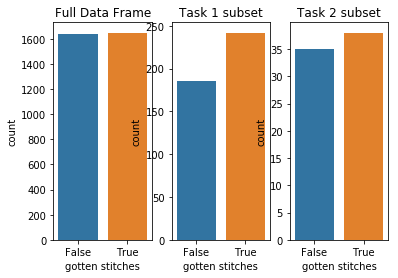

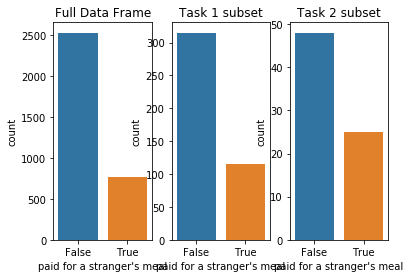

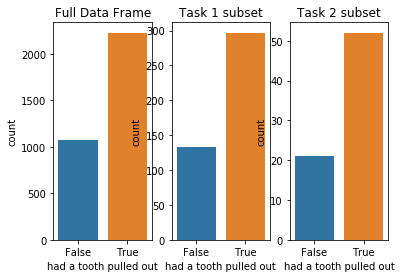

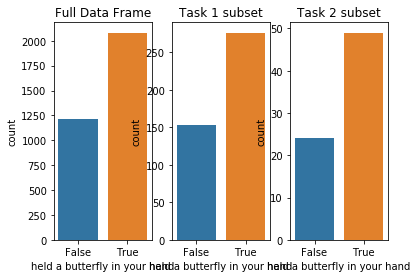

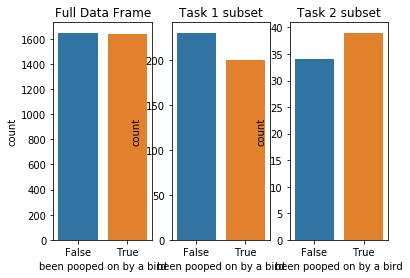

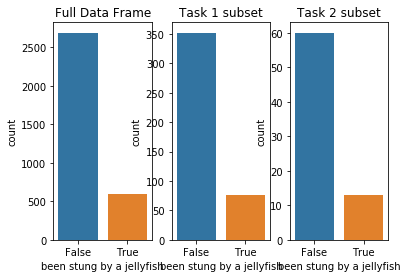

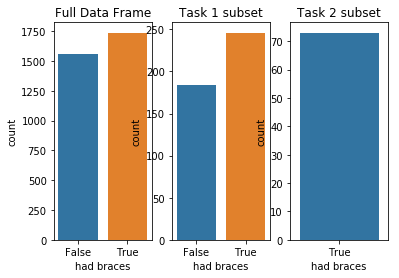

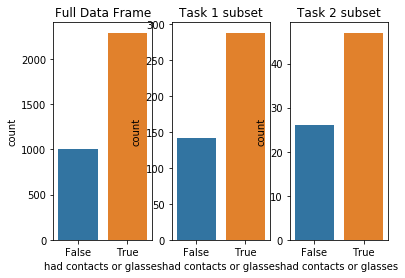

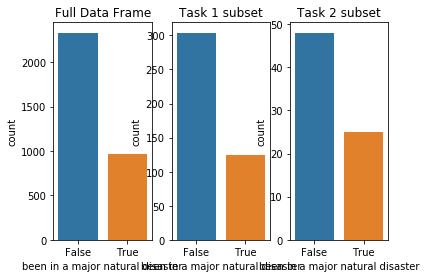

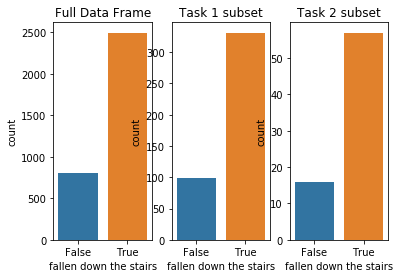

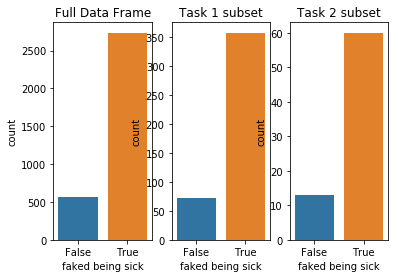

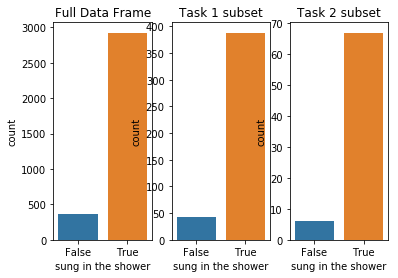

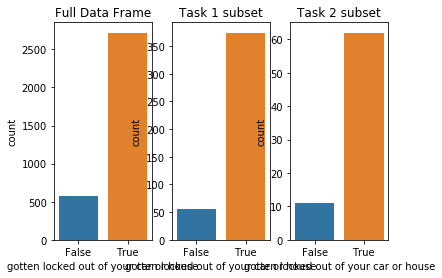

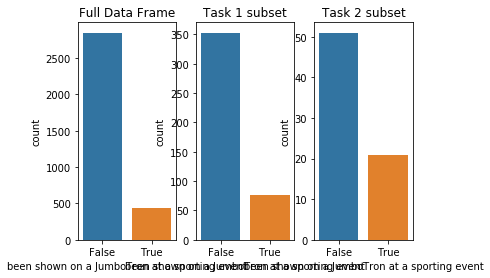

In [8]:
for col in col_list[1:]:
    fig, ax =plt.subplots(1,3)
    ax[0].set_title('Full Data Frame')
    sns.countplot(full_df[col], ax=ax[0])
    ax[1].set_title('Task 1 subset')
    sns.countplot(task_1[col], ax=ax[1])
    ax[2].set_title('Task 2 subset')
    sns.countplot(task_2[col], ax=ax[2])

### Task 1 Observations
The 19-24 group who had already experienced a broken bone was more likely to have been on the radio or television, gotten stitches,had braces, but on the positive side were less likely to have been defecated on by a bird.

### Task 2 Observations
The group of marathon runners who had had braces were more likely to have gotten a speeding ticket, gone skydiving, driven a boat, been on water skis, been on a motorcycle, been horseback riding, been alpine skiing, regifted a gift, paid for a stranger's meal, been defecated on by a bird, have glasses or contacts, and been shown on a jumbotron at a sporting event. 

### Step 3: One last hypothesis

Observations in the 19-24 who have broken bones subgroup doesn’t seem to have a lot of distinctions between them and the general population. One possible explanation is that by the time one reaches the age of 25 the vast majority of them have already suffered a broken bone before (so not everyone is in the task one category but that everyone would qualify for it after a point in their lives) 

In [9]:
hypo = full_df.loc[full_df['Age range'] != '19-24']
hypo = hypo.loc[hypo['Age range'] != '0-18']
hypo2 = hypo.loc[hypo['broken a bone'] == True]
hypo = hypo.loc[hypo['broken a bone'] == False]
print('Cases where person has been 19-24 and broken a bone: ',hypo2.shape[0],'\nCases where a person has been 19-24 but not broken a bone: ', hypo.shape[0])

Cases where person has been 19-24 and broken a bone:  471 
Cases where a person has been 19-24 but not broken a bone:  628


In [10]:
full_df['Age range'].value_counts()

19-24    1445
25-34     860
0-18      760
35-44     177
45-54      42
55-64      15
65-74       4
75+         2
Name: Age range, dtype: int64

In [11]:
a18 = full_df.loc[full_df['Age range'] == '0-18']
a24 = full_df.loc[full_df['Age range'] == '19-24']
a34 = full_df.loc[full_df['Age range'] == '25-34']
a44 = full_df.loc[full_df['Age range'] == '35-44']
a54 = full_df.loc[full_df['Age range'] == '45-54']
a64 = full_df.loc[full_df['Age range'] == '55-64']
a74 = full_df.loc[full_df['Age range'] == '65-74']
a100 = full_df.loc[full_df['Age range'] == '75+']

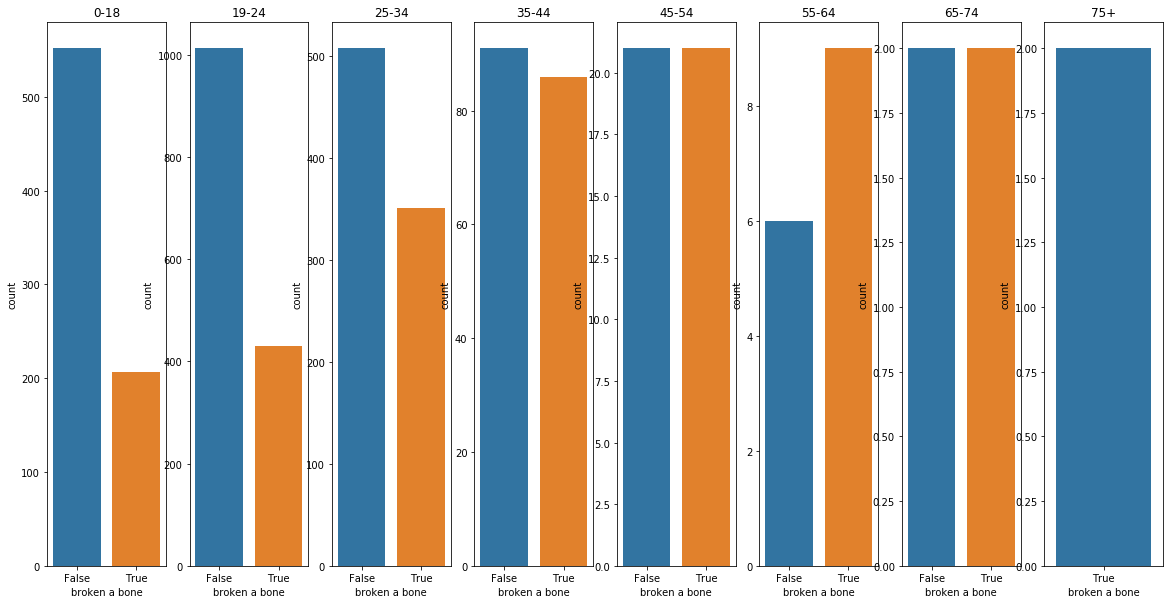

In [12]:
col = 'broken a bone'

fig, ax =plt.subplots(1,8, figsize=(20, 10))
ax[0].set_title('0-18')
sns.countplot(a18[col], ax=ax[0])
ax[1].set_title('19-24')
sns.countplot(a24[col], ax=ax[1])
ax[2].set_title('25-34')
sns.countplot(a34[col], ax=ax[2])
ax[3].set_title('35-44')
sns.countplot(a44[col], ax=ax[3])
ax[4].set_title('45-54')
sns.countplot(a54[col], ax=ax[4])
ax[5].set_title('55-64')
sns.countplot(a64[col], ax=ax[5])
ax[6].set_title('65-74')
sns.countplot(a74[col], ax=ax[6])
ax[7].set_title('75+')
sns.countplot(a100[col], ax=ax[7])


The graphs above, shows that the older a person is the more likely that they have experienced a broken bone. Note that there are only 21 cases that are older than 54 in the dataset so those figures should be taken with a grain of salt.

# Final Thoughts:

There was a greater number of observed differences in the second tasks responses. Many of these responses are tied to outdoor activities. I'm curious if more questions were added which were indoor activities, if then we would see some larger deviations in the other groups. This also makes me wonder about those who are 35+ who haven't broken broken bones and what makes that group unique. There are certainly more interesting tidbits that could be teased out of this data set. Thanks for viewing this notebook!

This year I've challenged myself to complete one task on Kaggle per week, in order to develop a larger Data Science portfolio. If you found this notebook useful or interesting please give it an upvote. I'm always open to constructive feedback. If you have any questions, comments, concerns, or if you would like to collaborate on a future task of the week feel free to leave a comment here or message me directly. For past TOTW check out the link to my page on github for this ongoing project
https://github.com/Neil-Kloper/Weekly-Kaggle-Task/wiki